In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris_dataset = load_iris()
data = iris_dataset.data
data = data[:, :2]  # sepal length and sepal width

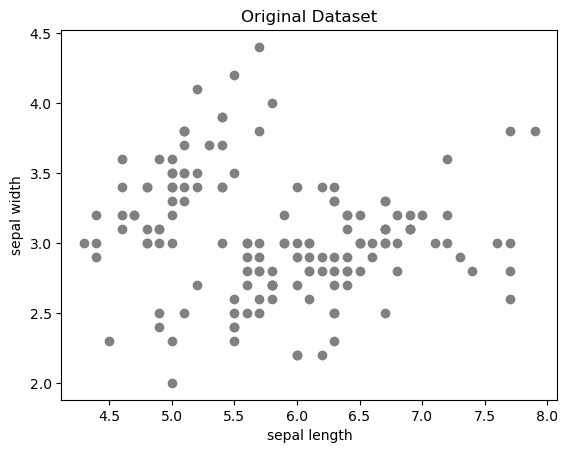

In [4]:
plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Original Dataset')

plt.show()

In [12]:
class KMeans:
    def __init__(self, k=3, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None
        self.clusters = None

    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def assign_clusters(self, data):
        distances = np.array(
            [
                [self.euclidean_distance(x, centroid) for centroid in self.centroids]
                for x in data
            ]
        )
        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):
        self.initialize_centroids(data)
        for iter in range(self.max_iter):
            self.clusters = self.assign_clusters(data)

            self.plot_clusters(data, iter)

            new_centroids = self.update_centroids(data)

            if np.all(self.centroids == new_centroids):
                break  # converged

            self.centroids = new_centroids

        self.plot_final_clusters(data)

    def plot_clusters(self, data, iteration):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', s=150, marker='x')
        plt.title(f"Iteration: {iteration+1}")  # index 0-based
        plt.xlabel('sepal length')
        plt.ylabel('sepal width')
        plt.show()

    def plot_final_clusters(self, data):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', s=150, marker='x')
        plt.title('Final Clustering')
        plt.xlabel('sepal length')
        plt.ylabel('sepal width')
        plt.show()

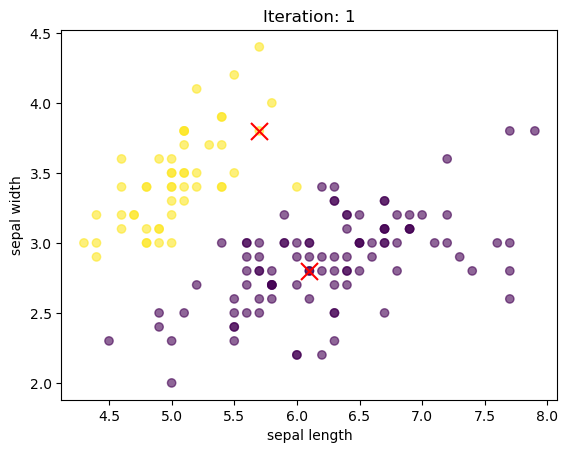

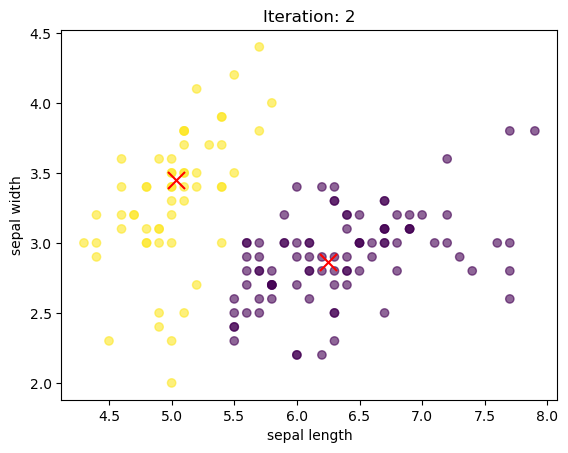

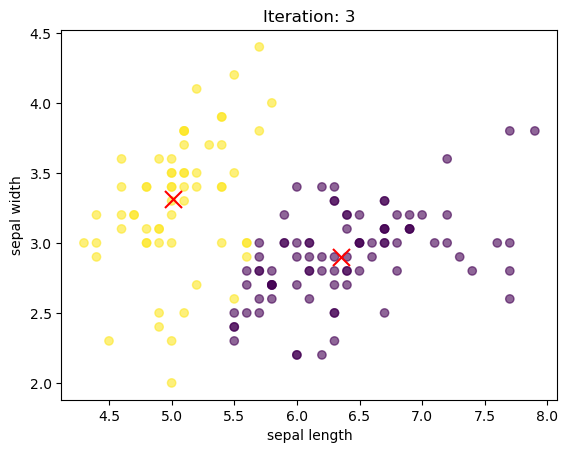

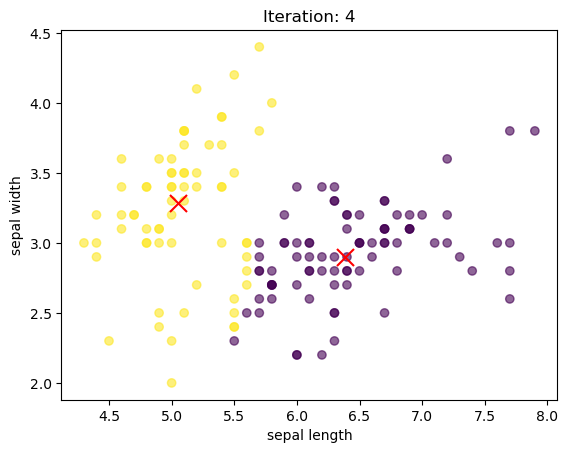

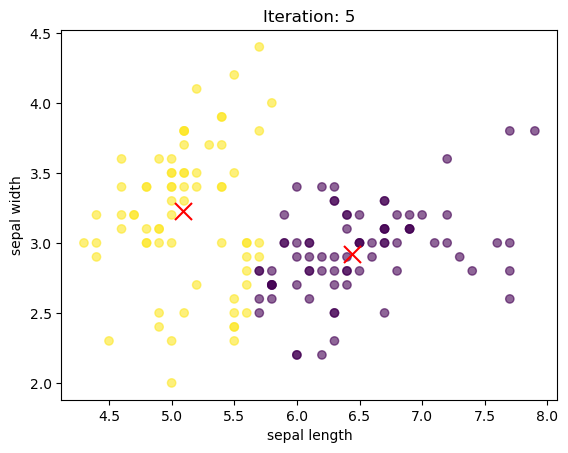

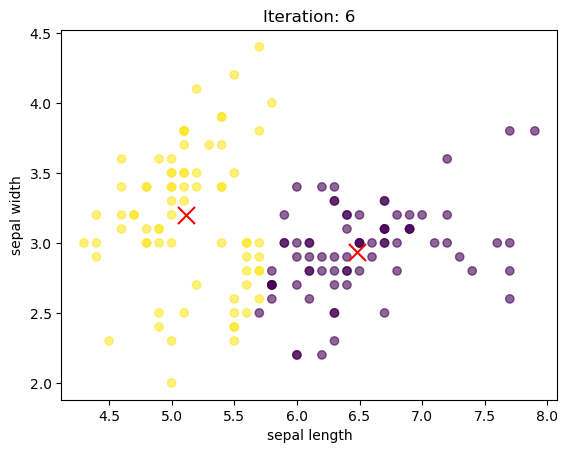

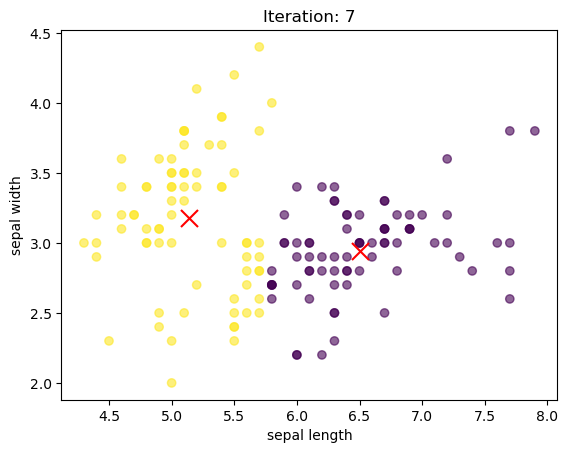

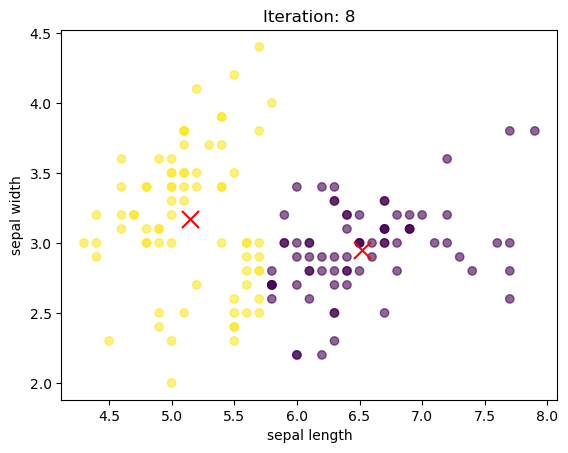

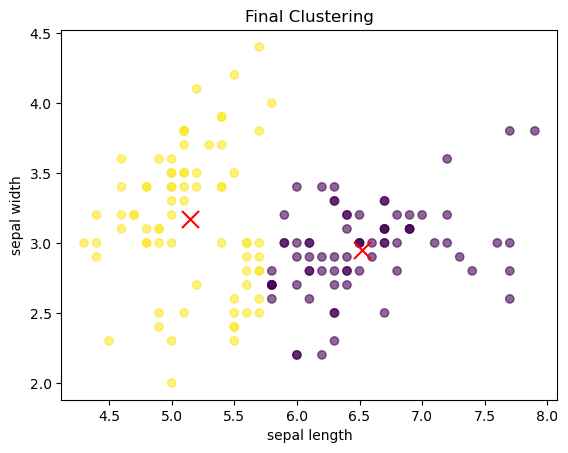

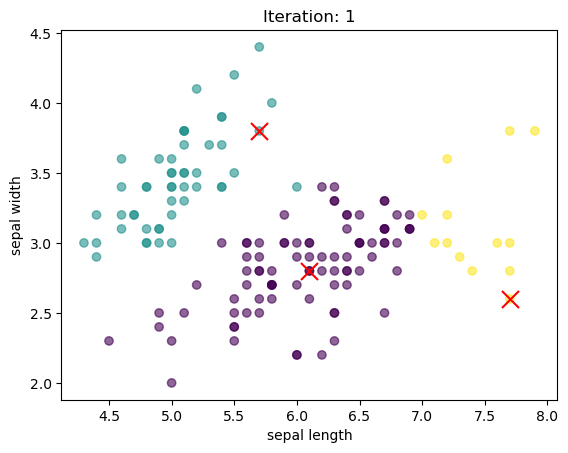

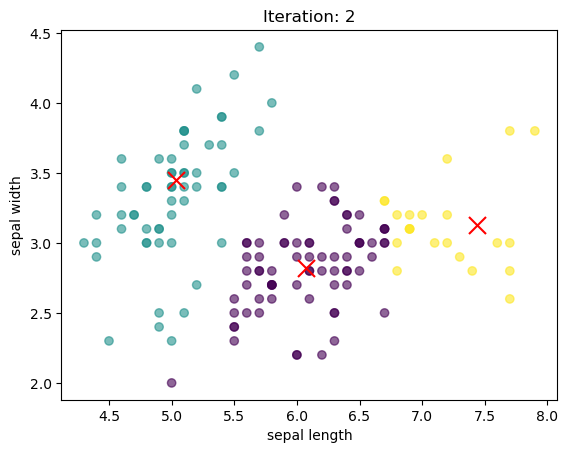

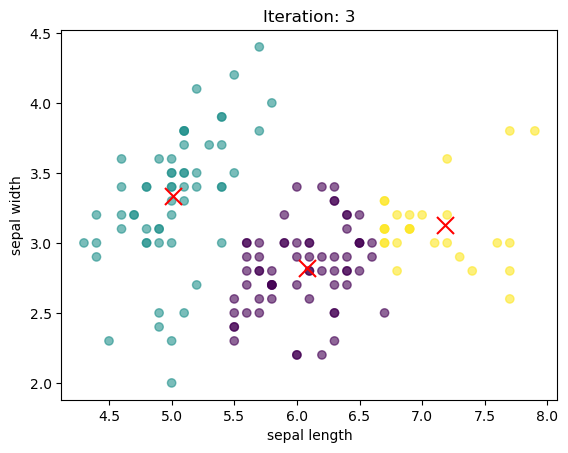

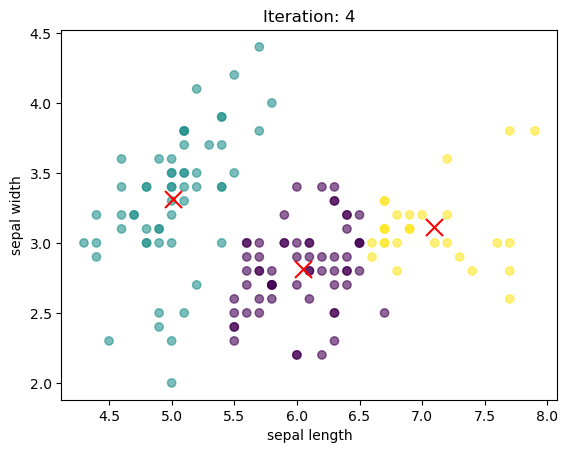

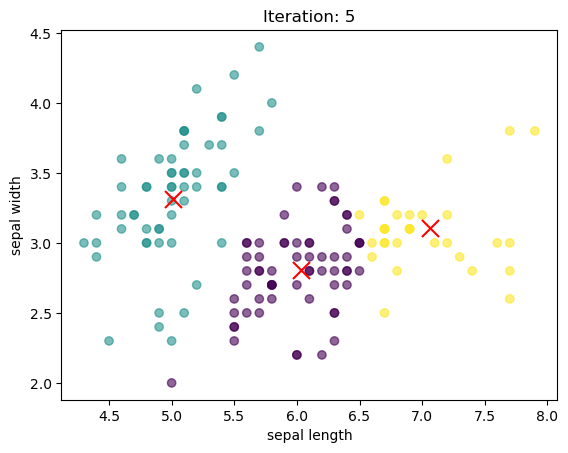

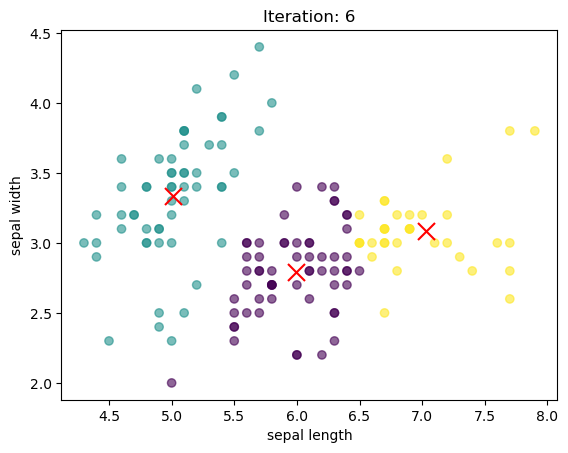

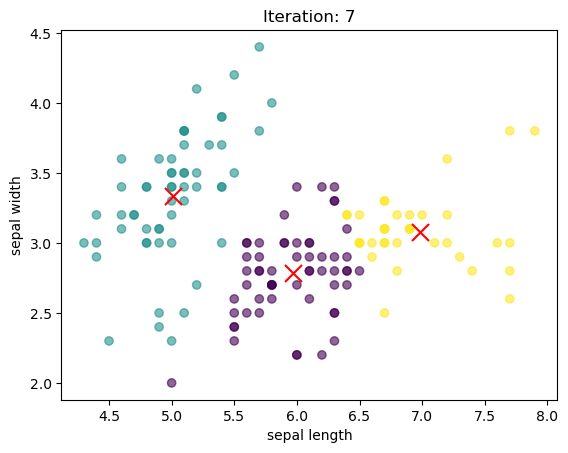

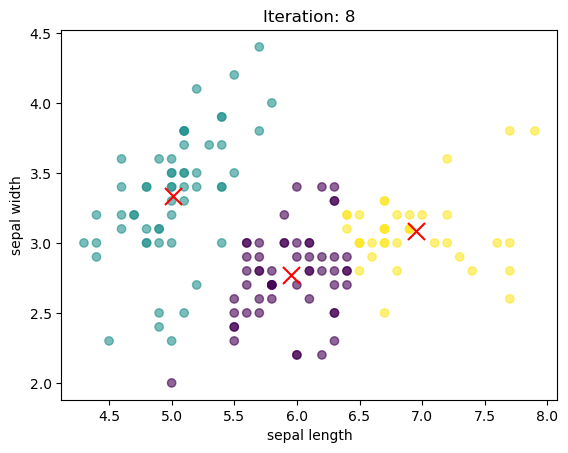

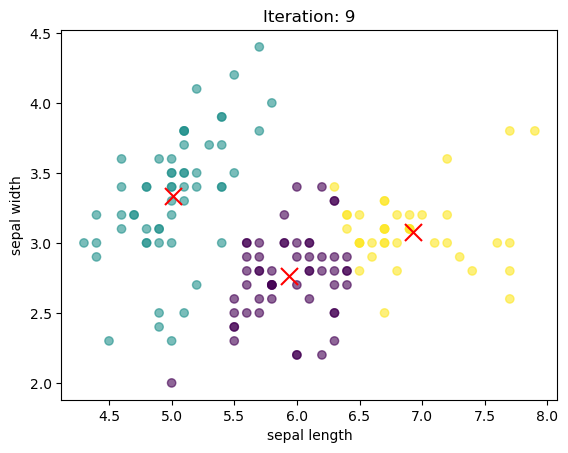

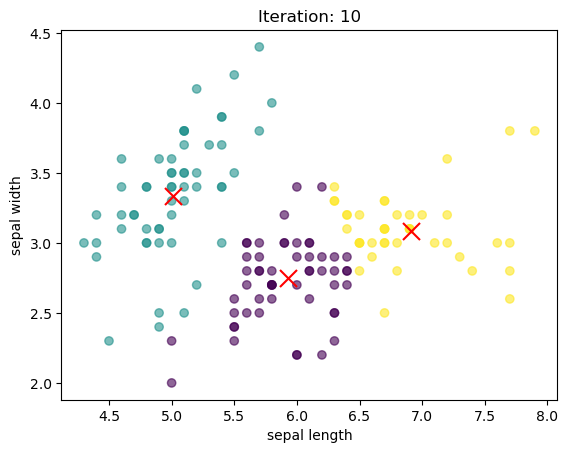

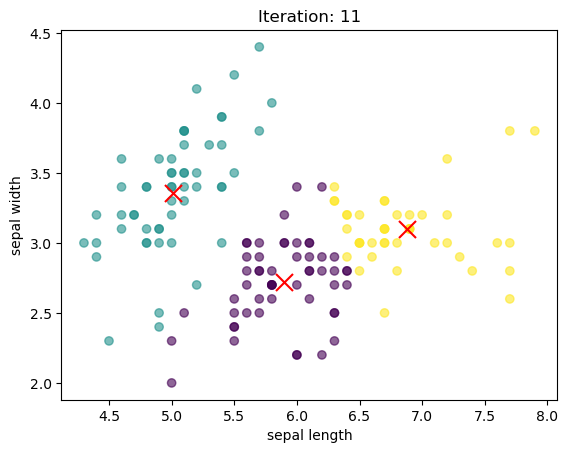

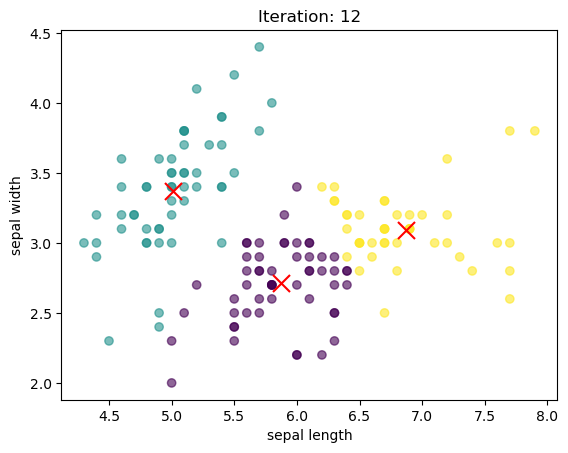

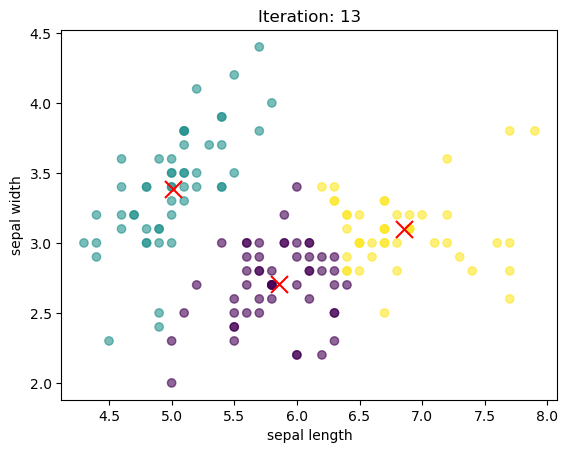

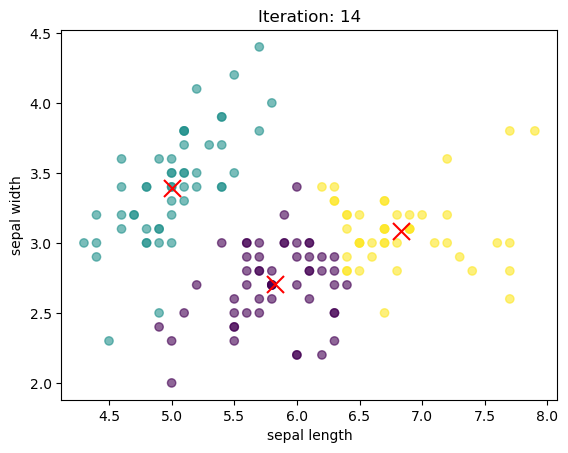

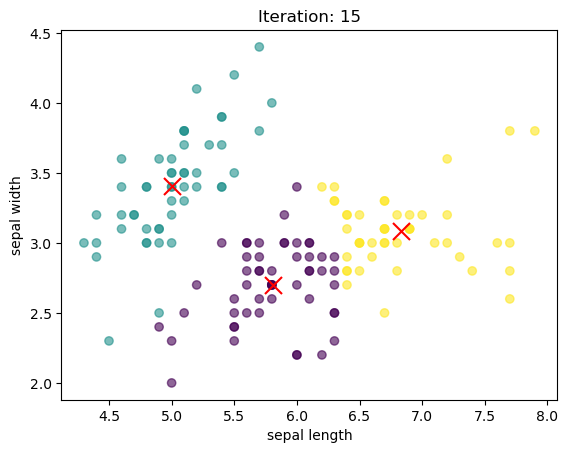

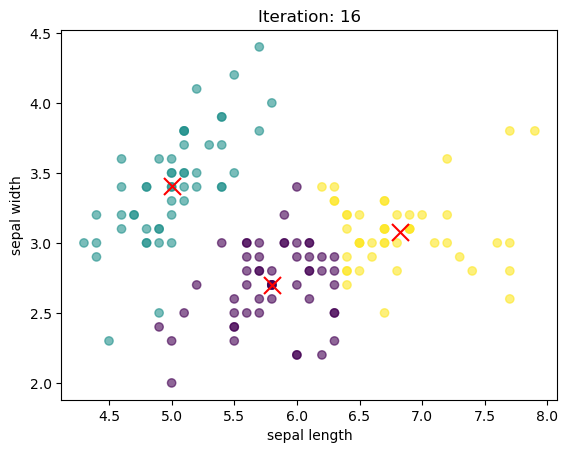

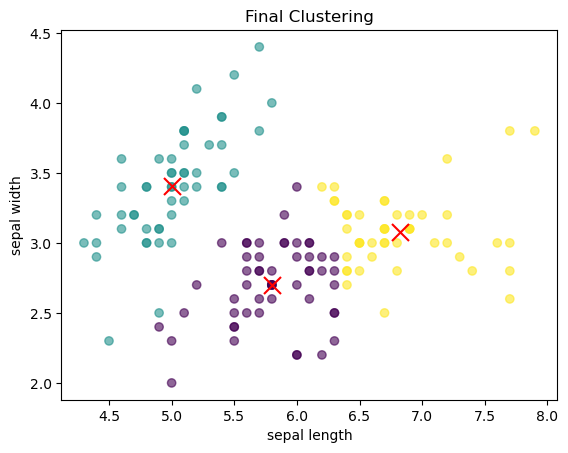

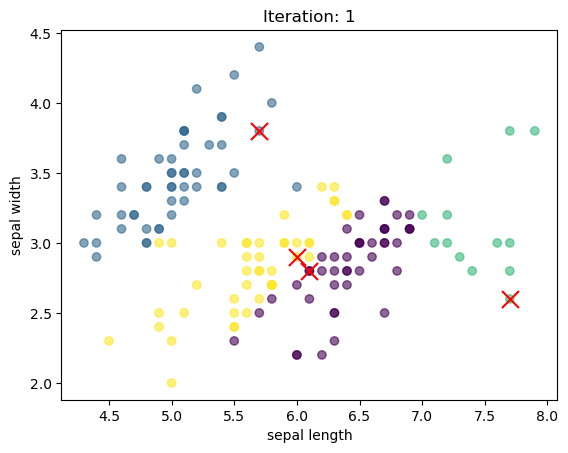

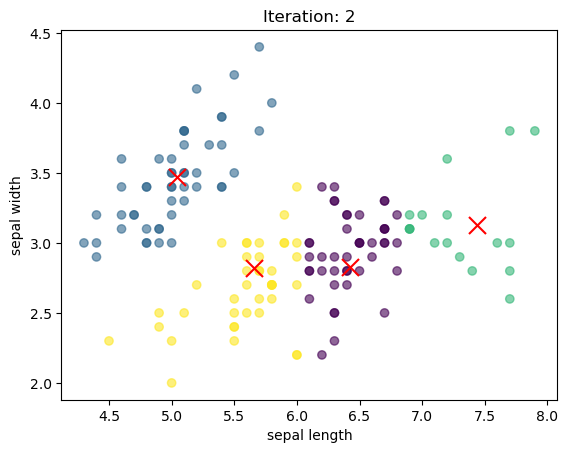

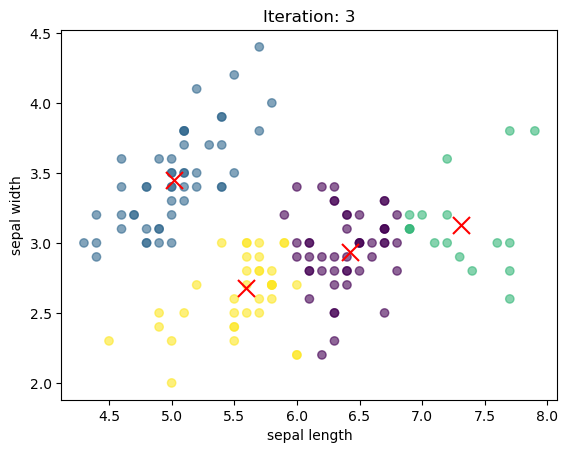

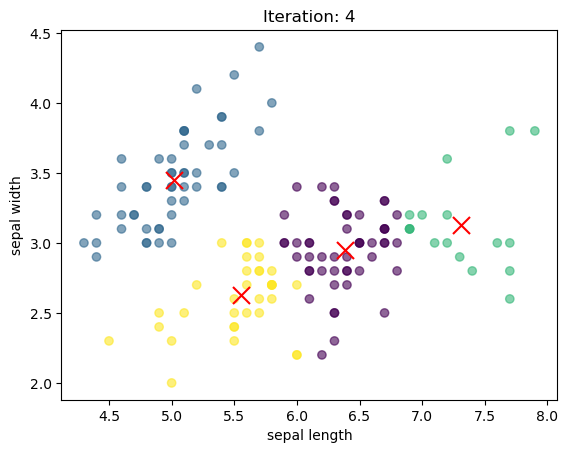

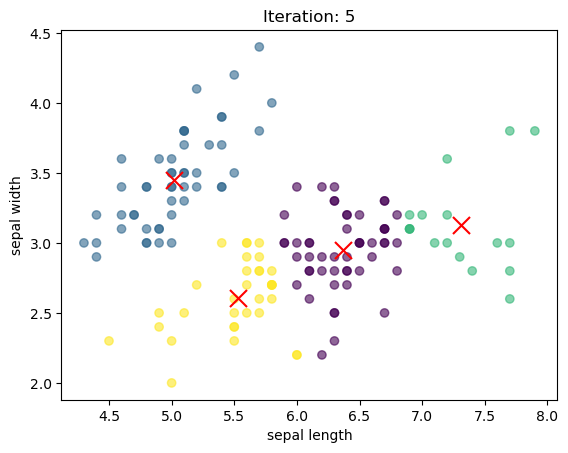

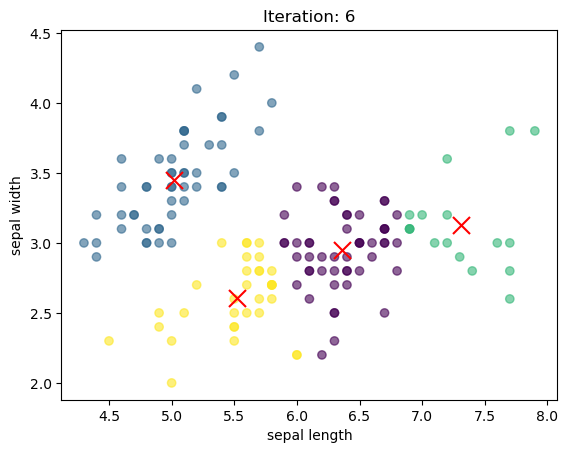

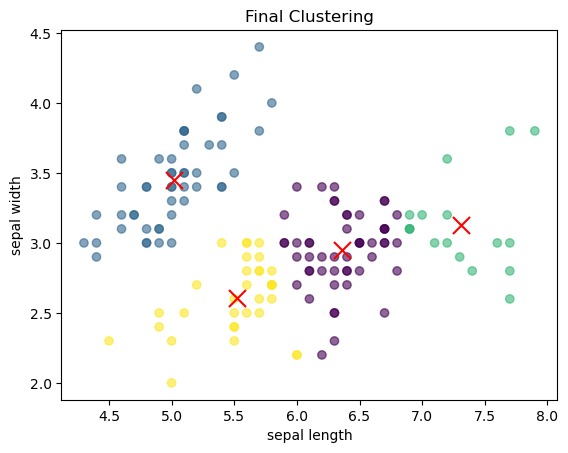

In [15]:
kmeans = KMeans(k=2, max_iter=100)
kmeans.fit(data)

kmeans = KMeans(k=3, max_iter=100)
kmeans.fit(data)

kmeans = KMeans(k=4, max_iter=100)
kmeans.fit(data)